In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [25]:
base = pd.read_csv("clean_base111.csv", encoding="latin-1")
base['YEAR'] = base['YEAR'].astype(int)

# Data volumetry

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


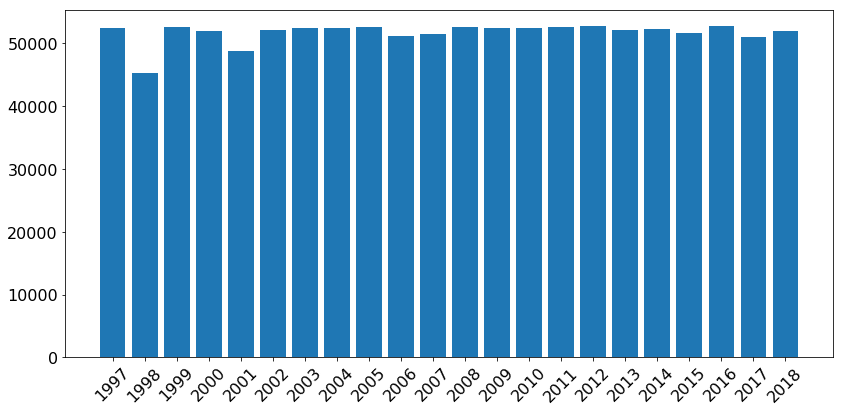

In [26]:
volumetry = base.groupby('YEAR').agg({'DAY365': 'count'}).reset_index()

fig = plt.figure(figsize=(12, 6))
# plt.title("Volumetria base original")
N = np.arange(len(volumetry['DAY365']))
plt.bar(N,volumetry['DAY365'].values)
plt.xticks(N,volumetry['YEAR'],rotation = 45)
plt.savefig("fig/CEPAGRI_volumetria")
plt.show()

# Visualization of inconsistent intervals of climatic variables

In [27]:
base.columns

Index(['COD', 'YEAR', 'DAY365', 'MINUTE2400', 'N_WNDVEL_5M', 'N_WNDVEL_2M',
       'N_WNDDIR_DEGREE', 'N_INCRAD_10MSR', 'N_REFRAD_10MSR',
       'N_PHTFLOW_10MSR', 'N_NHTFLOW_10MSR', 'N_AIRMTR_PCT10',
       'N_AIRTMP_MED10', 'N_GRDTMP_3CM', 'N_GRDTMP_6CM', 'N_GRDTMP_UV',
       'N_PRESSION_HPA', 'N_RAIN_SUM10'],
      dtype='object')

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


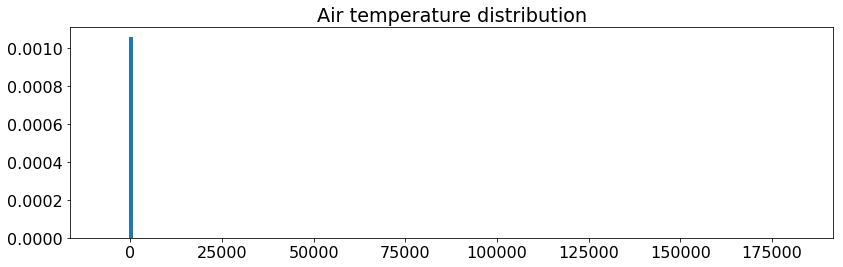

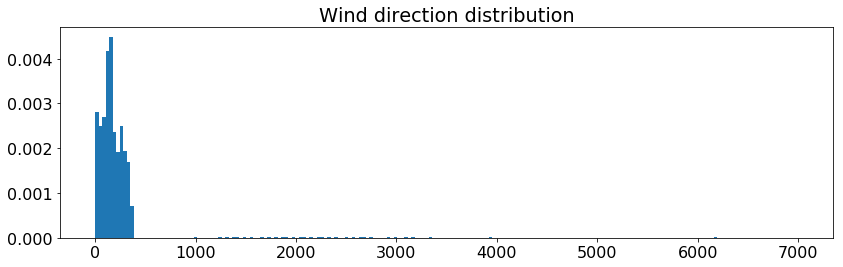

In [69]:
plt.figure(figsize=(12,4))
plt.title("Air temperature distribution")
plt.hist(base['N_AIRTMP_MED10'],bins=200, normed=True)
plt.savefig("fig/tempdist_pre")
plt.show()

plt.figure(figsize=(12,4))
plt.title("Wind direction distribution")
plt.hist(base['N_WNDDIR_DEGREE'],bins=200, normed=True)
plt.savefig("fig/directiondist_pre")
plt.show()

# Better interval to the main variables

1°) Temperatura do Ar (°C) - Air temperature

2°) Umidade relativa (%) - Air moisture

3°) Pressão (hPa) - Pression

4°) Direção do vento - Wind direction

In [29]:
#Defining functions to check data volumetry and variables intervals

#Function to check volumetry
def volumetry(data,safra, savefig='none', savefig_check = False):
    print("The full volumetry is ", data.shape[0])
    
    base_vol = data.groupby(safra).agg({'COD': 'count'}).reset_index()
    
    print("\nThe volumetry per month is ", base_vol.COD.mean())
    
    Anos = base[safra].unique()
    Anos.sort()
    
    if(savefig_check == False):
        fig = plt.figure(figsize=(12, 6))
        plt.bar(np.arange(len(Anos)), base_vol.COD)
        plt.xticks(np.arange(len(Anos)), Anos, rotation = 45)
        plt.show()
    else:
        fig = plt.figure(figsize=(12, 6))
        plt.bar(np.arange(len(Anos)), base_vol.COD)
        plt.xticks(np.arange(len(Anos)), Anos, rotation = 45)
        plt.savefig(savefig)
        plt.show()

#Function to check variable intervals
def info_var(data, var):
    
    mean_ = data[var].mean()
    min_ = data[var].min()
    max_ = data[var].max()
    std_ = data[var].std()
    
    print(f"The variable {var} mean is {mean_} +- {std_} \nThe min is {min_} and the maxi is {max_}")

## Air temperature 

In [30]:
base.columns.values

array(['COD', 'YEAR', 'DAY365', 'MINUTE2400', 'N_WNDVEL_5M', 'N_WNDVEL_2M',
       'N_WNDDIR_DEGREE', 'N_INCRAD_10MSR', 'N_REFRAD_10MSR',
       'N_PHTFLOW_10MSR', 'N_NHTFLOW_10MSR', 'N_AIRMTR_PCT10',
       'N_AIRTMP_MED10', 'N_GRDTMP_3CM', 'N_GRDTMP_6CM', 'N_GRDTMP_UV',
       'N_PRESSION_HPA', 'N_RAIN_SUM10'], dtype=object)

In [31]:
base_v1 = base.loc[(base['N_AIRTMP_MED10'] > -2) & (base['N_AIRTMP_MED10'] < 45), :]

In [32]:
#Variable intervals before
info_var(base,'N_AIRTMP_MED10')

The variable N_AIRTMP_MED10 mean is 25.507898548597847 +- 230.46244832583338 
The min is -6999.0 and the maxi is 182266.0


In [33]:
#Variable intervals after
info_var(base_v1,'N_AIRTMP_MED10')

The variable N_AIRTMP_MED10 mean is 21.60293938373301 +- 5.021327680425968 
The min is 1.825 and the maxi is 44.99


The full volumetry is  1137137

The volumetry per month is  51688.0454545


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


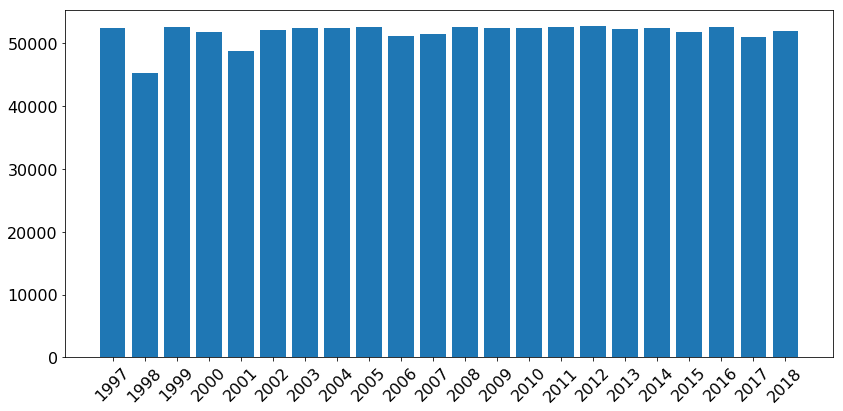

In [34]:
#Volumetry
volumetry(base_v1, 'YEAR')

In [35]:
#Volumetry difference 
base.shape[0] - base_v1.shape[0]

866

# Air moisture

In [36]:
base_v2 = base_v1.loc[(base_v1['N_AIRMTR_PCT10'] >= 0) & (base_v1['N_AIRMTR_PCT10'] <= 100), :]

In [37]:
#Variable intervals before
info_var(base_v1,'N_AIRMTR_PCT10')

The variable N_AIRMTR_PCT10 mean is 73.27571749138406 +- 25.42284598835739 
The min is -237.8 and the maxi is 6836.0


In [38]:
#Variable intervals after
info_var(base_v2,'N_AIRMTR_PCT10')

The variable N_AIRMTR_PCT10 mean is 73.22688220820051 +- 18.954035817754235 
The min is 5.689 and the maxi is 100.0


The full volumetry is  1137125

The volumetry per month is  51687.5


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


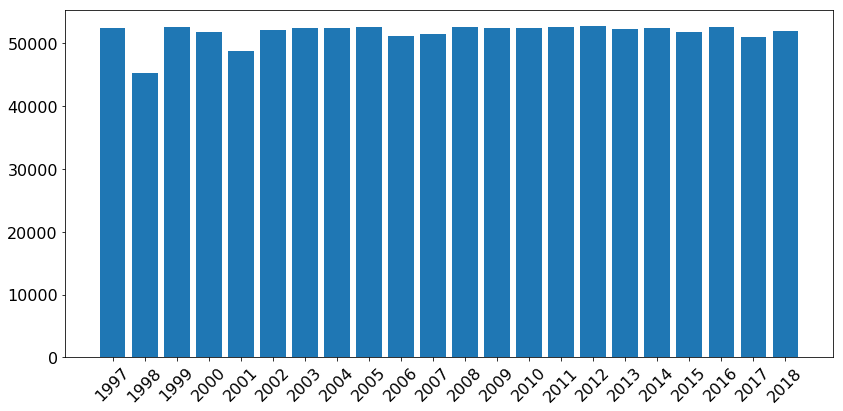

In [39]:
volumetry(base_v2, 'YEAR')

In [40]:
#Volumetry difference 
base_v1.shape[0] - base_v2.shape[0]

12

# Air pression

In [41]:
base_v3 = base_v2.loc[(base_v2['N_PRESSION_HPA'] >= 822) & (base_v2['N_PRESSION_HPA'] <= 1030), :]

In [42]:
#Variable intervals before
info_var(base_v2,'N_PRESSION_HPA')

The variable N_PRESSION_HPA mean is 946.036281543366 +- 79.46616187656959 
The min is -6999.0 and the maxi is 2802.0


In [43]:
#Variable intervals after
info_var(base_v3,'N_PRESSION_HPA')

The variable N_PRESSION_HPA mean is 946.8204788555737 +- 6.652040575798611 
The min is 822.0 and the maxi is 1028.0


The full volumetry is  1136919

The volumetry per month is  51678.1363636


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


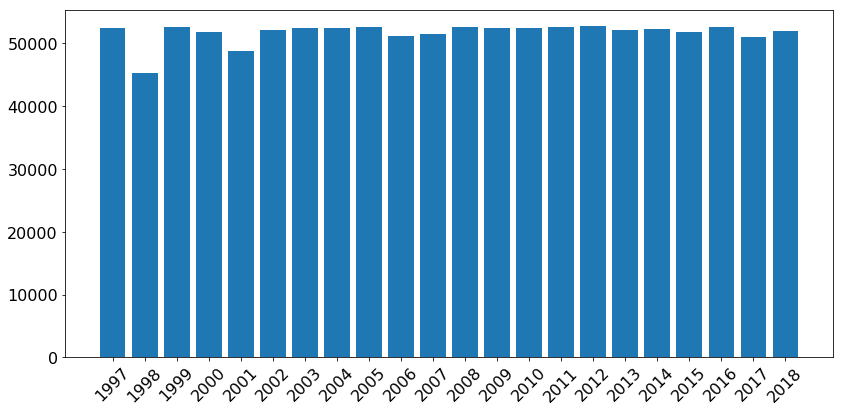

In [44]:
volumetry(base_v3, 'YEAR')

In [45]:
#Volumetry difference 
base_v2.shape[0] - base_v3.shape[0]

206

# Wind direction

In [46]:
base_v4 = base_v3.loc[(base_v3['N_WNDDIR_DEGREE'] >= 0) & (base_v3['N_WNDDIR_DEGREE'] <= 360), :]

In [47]:
#Variable intervals before
info_var(base_v3,'N_WNDDIR_DEGREE')

The variable N_WNDDIR_DEGREE mean is 261.82344972684956 +- 642.1854252817723 
The min is 0.0 and the maxi is 6999.0


In [48]:
#Variable intervals after
info_var(base_v4,'N_WNDDIR_DEGREE')

The variable N_WNDDIR_DEGREE mean is 164.56925714999815 +- 96.70951547886118 
The min is 0.0 and the maxi is 360.0


The full volumetry is  1104301

The volumetry per month is  50195.5


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


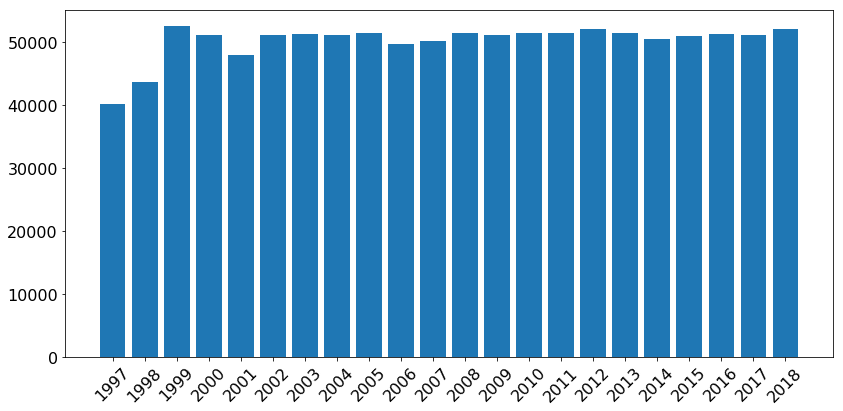

In [49]:
volumetry(base_v4, 'YEAR',savefig='fig/VOLUMETRIA_BETTER_INTERVALS', savefig_check = True)

In [50]:
#Volumetry difference 
base_v3.shape[0] - base_v4.shape[0]

32618

# Summary

In [51]:
#Summary

#Observation removed
qtde = base.shape[0] - base_v4.shape[0]

percent = 100*qtde/base.shape[0]

percent = round(percent,2)

print(f"{qtde} observations were removed what is {percent}% of the dataset")

33702 observations were removed what is 2.96% of the dataset


# Adding control variables of month and week

In [52]:
# Defining functions

#Function that gets month
def get_month(day):
    if((day>0) & (day <= 31)):
        return 1
    elif((day>31) & (day <= 59)):
        return 2
    elif((day>59) & (day <= 90)):
        return 3
    elif((day>90) & (day <= 120)):
        return 4
    elif((day>120) & (day <= 151)):
        return 5
    elif((day>151) & (day <= 181)):
        return 6
    elif((day>181) & (day <= 212)):
        return 7
    elif((day>212) & (day <= 243)):
        return 8
    elif((day>243) & (day <= 273)):
        return 9
    elif((day>273) & (day <= 304)):
        return 10
    elif((day>304) & (day <= 334)):
        return 11
    else:
        return 12
    
#Function that gets week
def get_week(days):
    return np.floor(days/7)

In [53]:
base_v4['MONTH'] = base_v4['DAY365'].map(get_month)
base_v4['WEEK'] = base_v4['DAY365'].map(get_week)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
print(base_v4.MONTH.unique())
print(base_v4.MONTH.nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
12


In [55]:
print(base_v4.WEEK.unique())
print(base_v4.WEEK.nunique())

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.]
53


In [56]:
#Exporting dataset

base_v4.to_csv("clean_base111_v2.csv", index=False)

In [57]:
base_v4 = pd.read_csv("clean_base111_v2.csv")

base_v4.N_REFRAD_10MSR[base_v4.N_REFRAD_10MSR > 1500].shape

(56463,)

In [58]:
base_v4.shape

(1104301, 20)

In [59]:
56525/1116885

0.05060950769327191

In [60]:
base_v4.N_REFRAD_10MSR[(base_v4.N_REFRAD_10MSR > 1500)&(base_v4.MINUTE2400 > 600)&(base_v4.MINUTE2400 < 1800)].shape

(52185,)

In [61]:
52245/56525

0.924281291463954

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


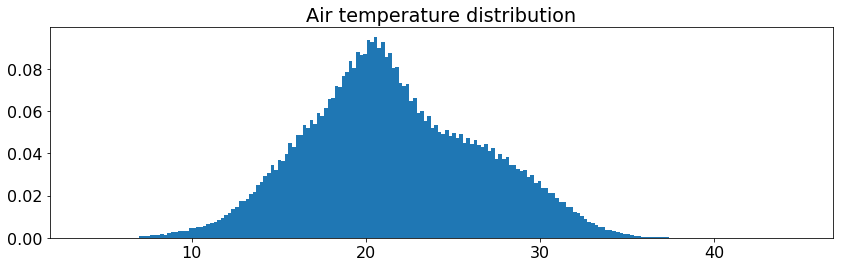

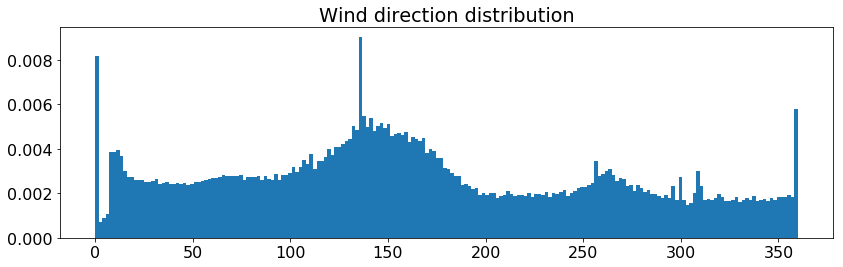

In [68]:
plt.figure(figsize=(12,4))
plt.title("Air temperature distribution")
plt.hist(base_v4['N_AIRTMP_MED10'],bins=200, normed=True)
plt.savefig("fig/tempdist_pos")
plt.show()

plt.figure(figsize=(12,4))
plt.title("Wind direction distribution")
plt.hist(base_v4['N_WNDDIR_DEGREE'],bins=200, normed=True)
plt.savefig("fig/directiondist_pos")
plt.show()

# Radiation analysis

In [63]:
base_v4.columns

Index(['COD', 'YEAR', 'DAY365', 'MINUTE2400', 'N_WNDVEL_5M', 'N_WNDVEL_2M',
       'N_WNDDIR_DEGREE', 'N_INCRAD_10MSR', 'N_REFRAD_10MSR',
       'N_PHTFLOW_10MSR', 'N_NHTFLOW_10MSR', 'N_AIRMTR_PCT10',
       'N_AIRTMP_MED10', 'N_GRDTMP_3CM', 'N_GRDTMP_6CM', 'N_GRDTMP_UV',
       'N_PRESSION_HPA', 'N_RAIN_SUM10', 'MONTH', 'WEEK'],
      dtype='object')

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


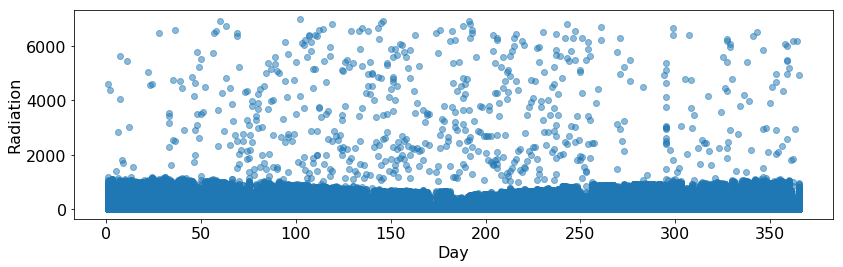

In [77]:
year = 2015

fig = plt.figure(figsize=(12, 4))
plt.scatter(base_v4[(base_v4.YEAR == year)]['DAY365'],base_v4[(base_v4.YEAR == year)]['N_INCRAD_10MSR'], alpha= 0.5)


plt.ylabel('Radiation')
plt.xlabel('Day')
plt.savefig("fig/radiacao_ano_2015", dpi=300)
plt.show()

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


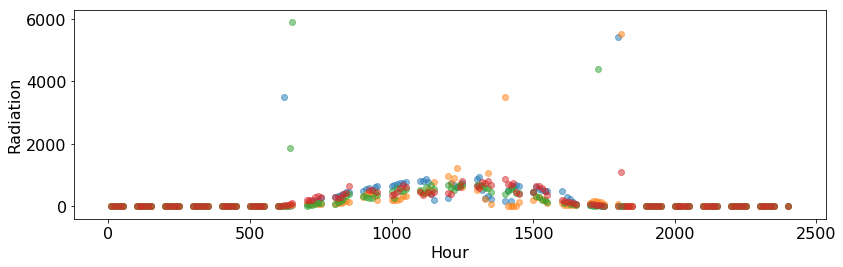

In [76]:
year = 2015
dia = 100

fig = plt.figure(figsize=(12, 4))
plt.scatter(base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['MINUTE2400'],base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['N_INCRAD_10MSR'], alpha= 0.5)

year = 2015
dia = 50
plt.scatter(base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['MINUTE2400'],base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['N_INCRAD_10MSR'], alpha= 0.5)

year = 2015
dia = 150
plt.scatter(base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['MINUTE2400'],base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['N_INCRAD_10MSR'], alpha= 0.5)

year = 2015
dia = 300
plt.scatter(base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['MINUTE2400'],base_v4[(base_v4.YEAR == year)&(base_v4['DAY365'] == dia)]['N_INCRAD_10MSR'], alpha= 0.5)


plt.ylabel('Radiation')
plt.xlabel('Hour')
plt.savefig("fig/radiacao_hora_dia", dpi=300)
plt.show()

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


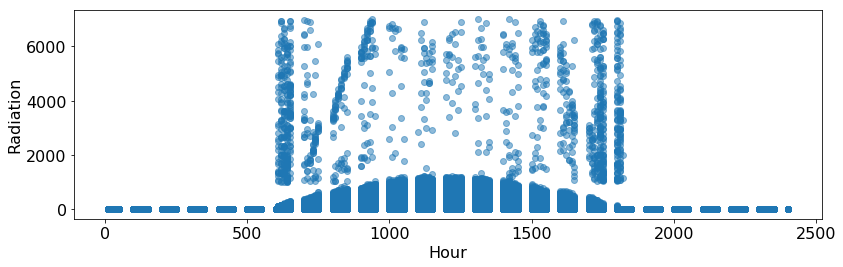

In [74]:
year = 2012
mon = 2

fig = plt.figure(figsize=(12, 4))
plt.scatter(base_v4[(base_v4.YEAR == year)]['MINUTE2400'],base_v4[(base_v4.YEAR == year)]['N_INCRAD_10MSR'], alpha= 0.5)
# plt.scatter(base[(base.Ano == year) ][main_vars[3]], base[(base.Ano == year)]['Direção do Vento no instante da aquisição (°)'], alpha= 0.5)

plt.ylabel('Radiation')
plt.xlabel('Hour')
plt.savefig("fig/radiacao_2012_horaminuto", dpi=300)
plt.show()